### Libraries

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

### Load Dataset

In [2]:
dataset, dataset_info = tfds.load('malaria', with_info = True, as_supervised = True,
                                  shuffle_files = True, split = ['train'])
## veri kümesi hakkında bilgi içeren dataset_info adlı değişkenin oluşturulmasını etkinleştirir.
## veri kümesinin yüklenirken eğitim verilerinin etiketli bir şekilde ((veri, etiket) çiftleri olarak) yüklenmesini sağlar.
## shuffle_files=True: Veri kümesinin dosyalarının karıştırılmasını etkinleştirir.
## Yüklenmek istenen veri kümesinin hangi bölümünü kullanmak istediğinizi belirler

In [3]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

### Split the train, validation and test set

In [4]:
def split(dataset, TRAIN_RATIO, TEST_RATIO, VAL_RATIO):

  DATASET_SIZE = len(dataset)

  train_dataset = dataset.take(int(TRAIN_RATIO * DATASET_SIZE))

  val_dataset_set = dataset.skip(int(TRAIN_RATIO * DATASET_SIZE))
  val_dataset = val_dataset_set.take(int(VAL_RATIO * DATASET_SIZE))

  test_dataset = val_dataset_set.skip(int(VAL_RATIO * DATASET_SIZE))

  return train_dataset, val_dataset, test_dataset




In [5]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2
TEST_RATIO = 0.2

#dataset = tf.data.Dataset.range(10)
train_dataset, val_dataset, test_dataset = split(dataset[0], TRAIN_RATIO, TEST_RATIO, VAL_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()), list(test_dataset.take(1).as_numpy_iterator()), list(val_dataset.take(1).as_numpy_iterator()))

# print(list(dataset.as_numpy_iterator()))
# DATASET_SIZE = len(dataset)

# train_dataset = dataset.take(int(TRAIN_RATIO * DATASET_SIZE))
# print(list(train_dataset.as_numpy_iterator()))

# val_dataset_set = dataset.skip(int(TRAIN_RATIO * DATASET_SIZE))
# val_dataset = val_dataset_set.take(int(VAL_RATIO * DATASET_SIZE))
# print(list(val_dataset.as_numpy_iterator()))

# test_dataset = val_dataset_set.skip(int(VAL_RATIO * DATASET_SIZE))
# #test_dataset = test_dataset.skip(int(VAL_RATIO * DATASET_SIZE))
# print(list(test_dataset.as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

In [6]:
for data in dataset[0].take(3):  ## Eğitim veri kümesinden sadece bir örneği (bir batch) alır.
  print(data)

(<tf.Tensor: shape=(145, 148, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(133, 127, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [7]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

### Dataset Visualization

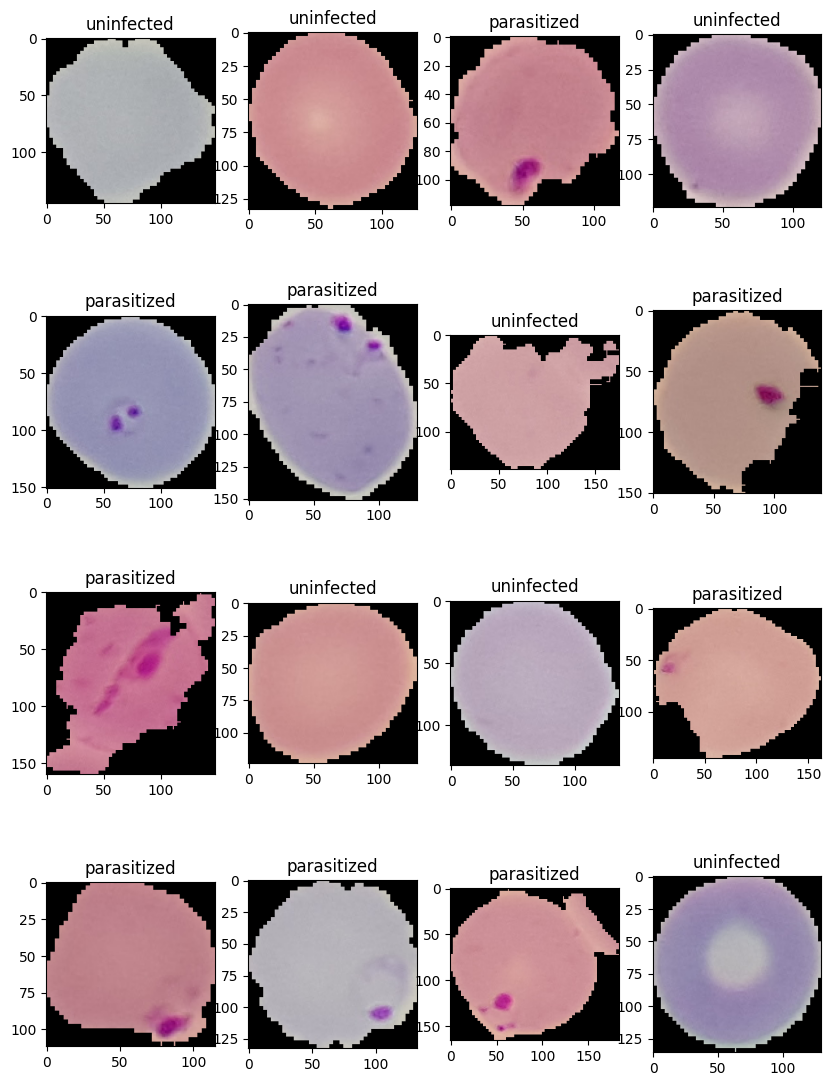

In [8]:
plt.figure(figsize = (10, 14))
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  ## plt.axis('off')

In [9]:
for i in range(2):
  print(dataset_info.features['label'].int2str(i))

parasitized
uninfected


### Data Preprocessing

In [10]:
IMG_SIZE = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0, label

In [11]:
train_dataset = train_dataset.map(resize_rescale)

In [12]:
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

In [13]:
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [14]:
# from tensorflow.python.data.ops.dataset_ops import PrefetchDataset
# BATCH_SIZE = 32
# train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True, batch(BATCH_SIZE), prefetch(tf.data.AUTOTUNE))

In [15]:
import tensorflow as tf

BATCH_SIZE = 32

# Öncelikle veri kümesini oluşturun veya yükleyin.

# Veri kümesini karıştırın ve yinelerin her döneminde tekrar karıştırın.
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True)

# Veri kümesini küme boyutuna bölmek için batch kullanın.
train_dataset = train_dataset.batch(BATCH_SIZE)

# Veri kümesini prefetch kullanarak daha hızlı yüklemek için hazırlayın.
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

In [16]:
#test_dataset = test_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

### Creating a model

In [27]:
from keras.src.engine.input_layer import InputLayer
model = tf.keras.Sequential([
    InputLayer(input_shape = (IMG_SIZE, IMG_SIZE, 3)),
    Conv2D(filters = 6, kernel_size = 3, strides = (1, 1), padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),
    Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),
    Flatten(),
    Dense(units = 128, activation = 'relu'),
    BatchNormalization(),
    Dense(units = 12, activation = 'relu'),
    BatchNormalization(),
    Dense(units = 1, activation = 'sigmoid')

])
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_2 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_3 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                      

### Compiling the Model

In [18]:
y_true = [0, 0.5, 0]
y_pred = [0.8, 0.3, 0.0]
binary_cross_entropy = tf.keras.losses.BinaryCrossentropy() ## from_logits = True
binary_cross_entropy(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.796587>

In [28]:
model.compile(optimizer = Adam(learning_rate = 0.01),
              loss = BinaryCrossentropy(),
              metrics = ['accuracy'])

### Training the Model

In [29]:
history = model.fit(train_dataset,validation_data = val_dataset, epochs = 10, verbose = 1)

Epoch 1/10
517/517 [==============================] - 42s 75ms/step - loss: 0.3646 - accuracy: 0.8330 - val_loss: 0.1966 - val_accuracy: 0.9336
Epoch 2/10
517/517 [==============================] - 36s 70ms/step - loss: 0.1894 - accuracy: 0.9384 - val_loss: 0.3487 - val_accuracy: 0.9222
Epoch 3/10
517/517 [==============================] - 44s 85ms/step - loss: 0.1926 - accuracy: 0.9371 - val_loss: 0.1754 - val_accuracy: 0.9425
Epoch 4/10
517/517 [==============================] - 35s 69ms/step - loss: 0.1648 - accuracy: 0.9467 - val_loss: 0.1677 - val_accuracy: 0.9467
Epoch 5/10
517/517 [==============================] - 43s 83ms/step - loss: 0.1411 - accuracy: 0.9525 - val_loss: 0.2166 - val_accuracy: 0.9399
Epoch 6/10
517/517 [==============================] - 35s 67ms/step - loss: 0.1260 - accuracy: 0.9575 - val_loss: 0.1992 - val_accuracy: 0.9434
Epoch 7/10
517/517 [==============================] - 48s 93ms/step - loss: 0.1058 - accuracy: 0.9629 - val_loss: 0.2149 - val_accuracy:

In [21]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [22]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

### Plotting Accuracy and Loss

#### Loss

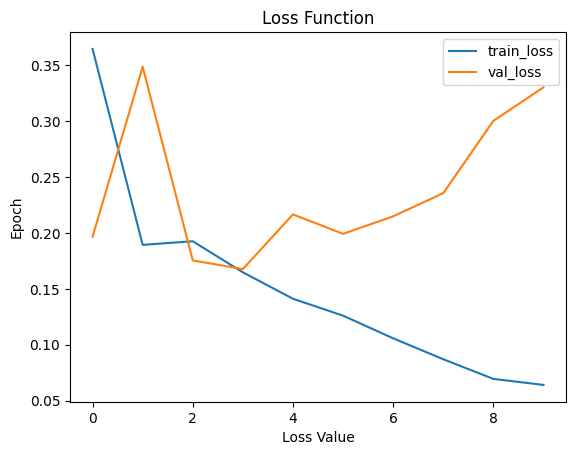

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Function')
plt.xlabel('Loss Value')
plt.ylabel('Epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

#### Accuracy

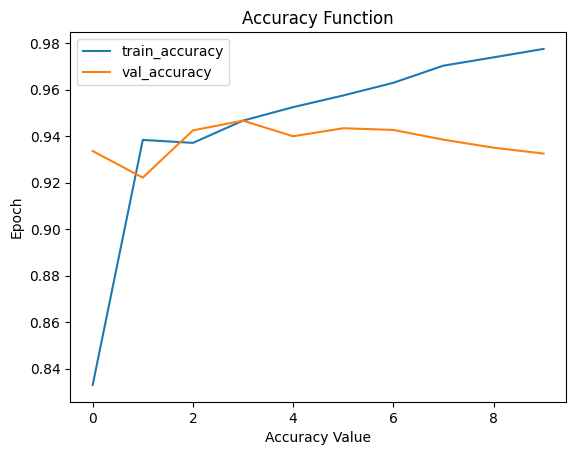

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Function')
plt.xlabel('Accuracy Value')
plt.ylabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

### Model Evaluate and Testing

In [35]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [36]:
test_dataset = test_dataset.batch(1)
## test veri kümesinin her bir veri örneğini ayrı ayrı işlemek için kullanılır

In [37]:
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [38]:
model.evaluate(test_dataset)

5513/5513 [==============================] - 32s 4ms/step - loss: 0.3177 - accuracy: 0.9311


[0.31772780418395996, 0.9310719966888428]

In [39]:
model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 11s 11s/step


0.5366379

In [40]:
def parasite_or_not(x):
  if(x < 0.5):
    return str('Parasitized')
  else:
    return str('Uninfected')

In [57]:
parasite_or_not(model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 10s 10s/step


'Uninfected'

In [54]:
parasite_or_not(model.predict(test_dataset.take(2))[0][0])

2/2 [==============================] - 10s 9ms/step


'Uninfected'

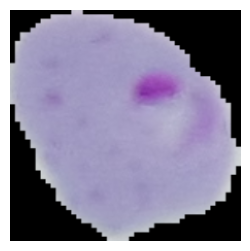

In [56]:
plt.figure(figsize = (3, 3))
image, label = next(iter(train_dataset))
plt.imshow(image[1])
plt.axis('off');

#### Testing

1/1 [==============================] - 0s 20ms/step


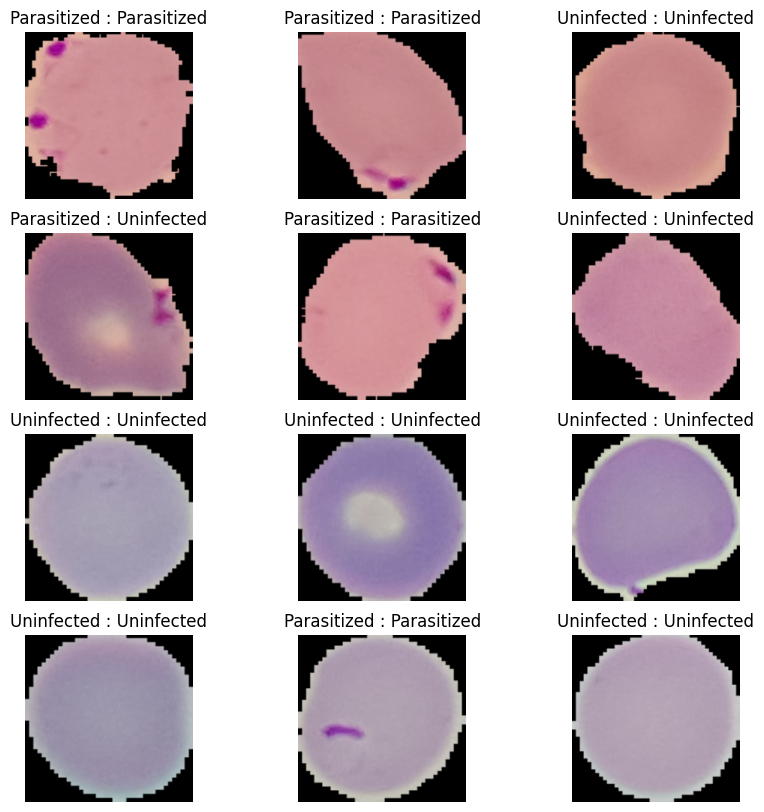

In [60]:
plt.figure(figsize = (10, 10))
for i, (image, label) in enumerate(test_dataset.take(12)):
  ax = plt.subplot(4, 3, i + 1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ' : ' + str(parasite_or_not(model.predict(image)[0][0])))
  plt.axis('off')
plt.show()

### Loading and Saving

In [61]:
model.save('Malaria_model')

In [62]:
new_model = tf.keras.models.load_model('Malaria_model')
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_2 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_3 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                      

#### Prediction with loaded model

1/1 [==============================] - 0s 21ms/step


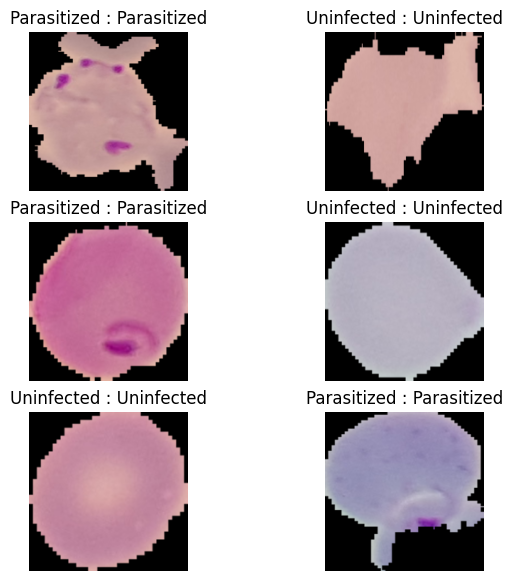

In [65]:
plt.figure(figsize = (7, 7))
for i, (image, label) in enumerate(test_dataset.take(6)):
  ax = plt.subplot(3, 2, i + 1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ' : ' + str(parasite_or_not(new_model.predict(image)[0][0])))
  plt.axis('off')
plt.show()

In [66]:
new_model.evaluate(test_dataset)

5513/5513 [==============================] - 32s 4ms/step - loss: 0.3195 - accuracy: 0.9305


[0.3194580376148224, 0.9305278658866882]

In [67]:
### save with hdf5 file extension
model.save('new_model_2.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
new_model_2 = tf.keras.models.load_model('new_model_2.hdf5')
new_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_2 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_3 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                      

In [70]:
### save only weights of the model
model.save_weights('weights/model_weights')

In [72]:
new_model_2.load_weights('weights/model_weights')
new_model_2.evaluate(test_dataset)

5513/5513 [==============================] - 32s 4ms/step - loss: 0.3204 - accuracy: 0.9303


[0.32035982608795166, 0.9303464293479919]